In [156]:
import torch
from sklearn.datasets import make_circles


In [157]:
n_samples=1000

X,y=make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)



In [158]:
X[:10],y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [159]:
import pandas as pd
df=pd.DataFrame({

    "X1":X[:,0],

    "X2":X[:,1],
    "label":y
}
)

df

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [160]:
df.label.value_counts()

,count
label,
1,500
0,500


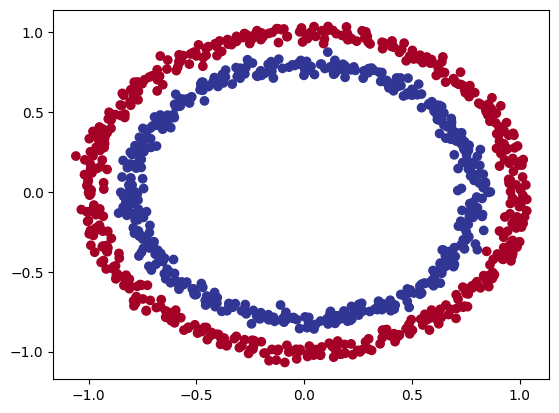

In [161]:
#viewing the data in matplotlib
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [162]:
X.shape,y.shape

((1000, 2), (1000,))

In [163]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [164]:
#turning data into tensors
X_tensor=torch.from_numpy(X).type(torch.float)
y_tensor=torch.from_numpy(y).type(torch.float)

In [165]:
type(X_tensor),X_tensor.dtype

(torch.Tensor, torch.float32)

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_tensor,y_tensor,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [167]:
#checking device
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [168]:
#creating a model

from torch import nn


class make_circle_v1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=5)

    self.layer2=nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer2(self.layer1(x))

model_0=make_circle_v1().to(device)

In [169]:
untrained_pred=model_0(X_test.to(device))

# with torch.inference_mode():
print(f'length of predictions : {len(untrained_pred)}   shape: {untrained_pred.shape}')

print(f'length of test samples : {len(y_test)}   shape: {y_test.shape}')

print(f'first 10 predictions :{untrained_pred[:10]}')
print(f'first 10 test samples :{y_test[:10]}')


length of predictions : 200   shape: torch.Size([200, 1])
length of test samples : 200   shape: torch.Size([200])
first 10 predictions :tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], grad_fn=<SliceBackward0>)
first 10 test samples :tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [170]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [171]:
#defining the accuracy function
def acc(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  accuracy=(correct/len(y_pred))*100
  return accuracy

In [172]:
#note: logits =raw output of a neural network and we must convert raw output into desired output, for this the first step is we must pass it through activation function
#for binary classification, we can use sigmoid, and for multiclass, we can use softmax activation function
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944],
        [-0.1256],
        [-0.1183],
        [-0.0871],
        [-0.1990],
        [-0.1960],
        [-0.1177],
        [-0.0954],
        [-0.1381],
        [-0.1427],
        [-0.1568],
        [-0.0955],
        [-0.1151],
        [-0.1519],
        [-0.1497],
        [-0.0818],
        [-0.0904],
        [-0.2042],
        [-0.1365],
        [-0.1991],
        [-0.1948],
        [-0.0960],
        [-0.0808],
        [-0.1195],
        [-0.1835],
        [-0.1235],
        [-0.1012],
        [-0.1149],
        [-0.1977],
        [-0.1909],
        [-0.1980],
        [-0.1553],
        [-0.1857],
        [-0.0966],
        [-0.1733],
        [-0.1167],
        [-0.0981],
        [-0.1613],
        [-0.0945],
        [-0.1067],
        [-0.1559],
        [-0.1113],
        [-0.1144],
        [-0.

In [173]:
y_pred_prob=torch.sigmoid(y_logits)
y_x=torch.round(y_pred_prob)
y_x

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [174]:
#we can do all this in one line as
model_0.eval()
with torch.inference_mode():
  y_pred_label=torch.round(torch.sigmoid(model_0(X_test.to(device))))

In [175]:
y_pred_label[:10]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [176]:
torch.eq(y_pred_label.squeeze(),y_x.squeeze())

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [177]:
#building a training and testing loop

torch.manual_seed(42)
epochs=100
X_train,X_test,y_train,y_test=X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)


for epoch in range(epochs):
  model_0.train()

  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  accuracy=acc(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    y_pred_logits=model_0(X_test).squeeze()
    y_test_pred=torch.round(torch.sigmoid(y_pred_logits))

    test_loss=loss_fn(y_pred_logits,y_test)
    test_accuracy=acc(y_true=y_test,y_pred=y_test_pred)

    optimizer.zero_grad()

  if epoch%10==0:
    print(f'epoch: {epoch}  |  train loss: {loss:.5f}  |  train accuracy: {accuracy:.2f}%  |  test loss: {test_loss:.5f}  |  test accuracy: {test_accuracy:.2f}%')






epoch: 0  |  train loss: 0.69569  |  train accuracy: 50.00%  |  test loss: 0.69721  |  test accuracy: 50.00%
epoch: 10  |  train loss: 0.69403  |  train accuracy: 50.00%  |  test loss: 0.69615  |  test accuracy: 50.00%
epoch: 20  |  train loss: 0.69343  |  train accuracy: 46.00%  |  test loss: 0.69585  |  test accuracy: 48.50%
epoch: 30  |  train loss: 0.69321  |  train accuracy: 49.00%  |  test loss: 0.69577  |  test accuracy: 47.50%
epoch: 40  |  train loss: 0.69312  |  train accuracy: 49.50%  |  test loss: 0.69573  |  test accuracy: 46.50%
epoch: 50  |  train loss: 0.69308  |  train accuracy: 50.38%  |  test loss: 0.69569  |  test accuracy: 46.50%
epoch: 60  |  train loss: 0.69306  |  train accuracy: 50.50%  |  test loss: 0.69564  |  test accuracy: 46.50%
epoch: 70  |  train loss: 0.69305  |  train accuracy: 50.50%  |  test loss: 0.69559  |  test accuracy: 46.50%
epoch: 80  |  train loss: 0.69304  |  train accuracy: 50.75%  |  test loss: 0.69553  |  test accuracy: 46.50%
epoch: 90  

In [179]:
#making predictions with the model

#downloading helper functions
from pathlib import Path
import requests

if Path("helper_functions.py").is_file():
  print("alreaady exists")

else:
  print("downloading")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as file:
    file.write(request.content)

downloading


In [180]:
from helper_functions import plot_predictions,plot_decision_boundary

<ipython-input-182-e0c6363733ef>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


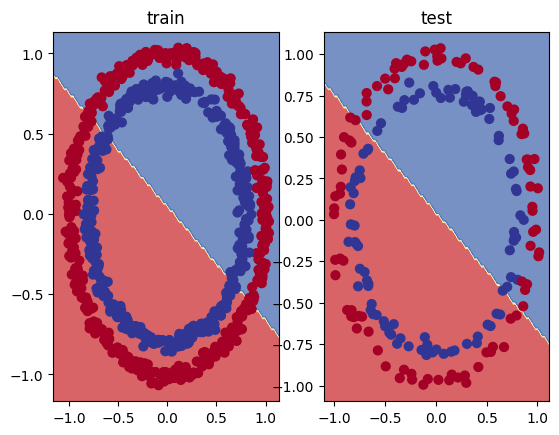

In [182]:
plt.plot(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

In [183]:
#model v2

class make_circle_v2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=10)

    self.layer2=nn.Linear(in_features=10, out_features=10)

    self.layer3=nn.Linear(in_features=10, out_features=1)

    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_1=make_circle_v2().to(device)
model_1

make_circle_v2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [191]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [194]:
#building a training and testing loop

torch.manual_seed(42)
epochs=10000
X_train,X_test,y_train,y_test=X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  accuracy=acc(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_pred_logits=model_1(X_test).squeeze()
    y_test_pred=torch.round(torch.sigmoid(y_pred_logits))

    test_loss=loss_fn(y_pred_logits,y_test)
    test_accuracy=acc(y_true=y_test,y_pred=y_test_pred)

    optimizer.zero_grad()

  if epoch%1000==0:
    print(f'epoch: {epoch}  |  train loss: {loss:.5f}  |  train accuracy: {accuracy:.2f}%  |  test loss: {test_loss:.5f}  |  test accuracy: {test_accuracy:.2f}%')






epoch: 0  |  train loss: 0.56818  |  train accuracy: 87.75%  |  test loss: 0.57378  |  test accuracy: 86.50%
epoch: 1000  |  train loss: 0.04176  |  train accuracy: 99.88%  |  test loss: 0.06583  |  test accuracy: 100.00%
epoch: 2000  |  train loss: 0.01672  |  train accuracy: 99.88%  |  test loss: 0.03363  |  test accuracy: 100.00%
epoch: 3000  |  train loss: 0.01048  |  train accuracy: 100.00%  |  test loss: 0.02451  |  test accuracy: 99.50%
epoch: 4000  |  train loss: 0.00765  |  train accuracy: 100.00%  |  test loss: 0.01993  |  test accuracy: 99.50%
epoch: 5000  |  train loss: 0.00603  |  train accuracy: 100.00%  |  test loss: 0.01726  |  test accuracy: 99.50%
epoch: 6000  |  train loss: 0.00499  |  train accuracy: 100.00%  |  test loss: 0.01557  |  test accuracy: 99.50%
epoch: 7000  |  train loss: 0.00428  |  train accuracy: 100.00%  |  test loss: 0.01451  |  test accuracy: 99.50%
epoch: 8000  |  train loss: 0.00375  |  train accuracy: 100.00%  |  test loss: 0.01374  |  test accu

<ipython-input-195-554e939d9f0f>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


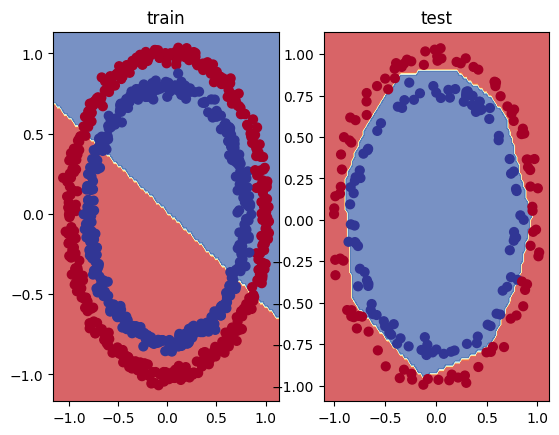

In [195]:
plt.plot(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

In [196]:
model_1.eval()
with torch.inference_mode():
  y_pred=torch.round(torch.sigmoid(model_1(X_test))).squeeze()


In [197]:
torch.eq(y_pred[:10],y_test[:10])

tensor([True, True, True, True, True, True, True, True, True, True])